This notebook has two sections 
- Genre Prediction based on a training set of audio files


## Imports

In [92]:
%conda install ipykernel
%conda install matplotlib  # this also install it tothe venv set up with your notebook 

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [120]:
%pip install librosa
%pip install pydub
%pip install tinytag
%pip install afinn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=2df0991fc34570bc11c30be9e5fe1c36af0719adc443562dcd1e356b69b21e2d
  Stored in directory: /Users/chacenielson/Library/Caches/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


## Creating a dataframe/CSV of song infomation for all songs 

In [94]:
import numpy as np

# get key from chromograph 
chroma_to_key = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

def get_key(chromagram):
    # Get the key of the song
    mean_chroma = np.mean(chromagram, axis=1)

    # Find the key by selecting the maximum chroma feature
    estimated_key_index = np.argmax(mean_chroma)
    estimated_key = chroma_to_key[estimated_key_index]

    return estimated_key

In [95]:
import librosa
import tinytag

# extracting the features from a song file
def extract_song_info(file_path):
    # Set up a dictioanry to hold all infomation for song
    music_data = {}

    # get Audio Info 
    audio_info = tinytag.TinyTag.get(file_path)
    
    music_data["title"] = audio_info.title
    music_data["artist"] = audio_info.artist
    music_data["album"] = audio_info.album
    music_data["duration"] = audio_info.duration
    music_data["genre"] = audio_info.genre
    music_data["composer"] = audio_info.composer
    music_data["bit_rate"] = f"{audio_info.bitrate} kbps"
    music_data["year"] = str(audio_info.year)
    
    # for more music data
    y, sr = librosa.load(file_path)
    
    if y.size > 0:
        # Extract the Tempo and beat frames
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

        # Convert beat frames to time and get the number of beats 
        beat_times = librosa.frames_to_time(beat_frames, sr=sr)
        num_beats = len(beat_times)
                
        # get the chromogram to estimate key
        chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

        # Add data to the dictionary
        music_data["key"] = get_key(chromagram)
        music_data["tempo"] = tempo
        music_data["num_beats"] = num_beats

    else:
        raise ValueError("Unable to extract audio data.")
    
    # return the music Dat
    return music_data


In [96]:
# example extraction 
extract_song_info("audio/MeAndJulioDownByTheSchoolyard.mp3")

{'title': 'Me And Julio Down By The Schoolyard',
 'artist': 'Paul Simon',
 'album': 'Paul Simon',
 'duration': 165.77768577287375,
 'genre': 'Alternative',
 'composer': None,
 'time_secs': 165.77768577287375,
 'bit_rate': '192.0 kbps',
 'year': '1987',
 'key': 'A',
 'tempo': 103.359375,
 'num_beats': 279}

In [97]:
# example extraction 
extract_song_info("audio/SomeKindofWonderful.mp3")

{'title': 'Some Kind Of Wonderful',
 'artist': 'Sky',
 'album': 'Piece Of Paradise',
 'duration': 227.5512365328907,
 'genre': 'Pop',
 'composer': None,
 'time_secs': 227.5512365328907,
 'bit_rate': '192.0 kbps',
 'year': '1998',
 'key': 'E',
 'tempo': 71.77734375,
 'num_beats': 268}

In [98]:
extract_song_info("audio/01 Angry.m4a")

/var/folders/81/z_z9fys15c37xjjhyz_p3nk40000gn/T/ipykernel_36198/1202981668.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)


{'title': 'Angry',
 'artist': 'Matchbox Twenty',
 'album': 'Mad Season',
 'duration': 225.07102040816326,
 'genre': 'Alternative',
 'composer': None,
 'time_secs': 225.07102040816326,
 'bit_rate': '256.0 kbps',
 'year': '2000',
 'key': 'A',
 'tempo': 117.45383522727273,
 'num_beats': 402}

In [100]:
import os
import pandas as pd

# Path to the "audio" folder - full of mp3 songs to make up the data
audio_folder = "audio"

# Initialize an empty list to store data for each song
songs_data = []

# Iterate through each file in the folder
for file_name in os.listdir(audio_folder):
    print("File: ", file_name)
    # Full path to the MP3 file
    file_path = os.path.join(audio_folder, file_name)

    try:
        # Extract information using your function
        song_data = extract_song_info(file_path)

        # Add the file name to the data
        song_data["file_name"] = file_name

        # Append the data to the list
        songs_data.append(song_data)
        
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Create a DataFrame from the list of song data
songs_df = pd.DataFrame(songs_data)

# Display the DataFrame
print(songs_df)

# Export the DataFrame to a CSV file
csv_filename = "songs_data.csv"
songs_df.to_csv(csv_filename, index=False)


File:  Dizzy Miss Lizzie.mp3
File:  76 Cool.m4a


/var/folders/81/z_z9fys15c37xjjhyz_p3nk40000gn/T/ipykernel_36198/1202981668.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)


File:  Honor to Us All.m4a
File:  Good Day Sunshine.m4a
File:  Learn To Fly.m4a
File:  04 Friend Like You.m4a
File:  01 Opera Singer.m4a
File:  11 The Valley (Reprise).m4a
File:  Runaway.m4a
File:  10 Lovesong.m4a
File:  Holiday Rap.m4a
File:  This Feeling.mp3
File:  09 Thrills.m4a
File:  04 You Can't Stop.mp3
File:  44 Mr. Lonely.m4a
File:  Illusion (feat. Echosmith).m4a
File:  Youth (Adventure Club Remix).mp3
File:  Wastin' Time.mp3
File:  03 Ever The Same.m4a
File:  03 Turn My Swag On.m4a
File:  I Found Love.m4a
File:  02 Diggin' Your Scene.m4a
File:  Animals.m4a
File:  02 Red Flag.m4a
File:  Boyfriend.m4a
File:  02 One Of The Brightest Stars.m4a
File:  05 Don't Stand So Close To Me.mp3
File:  It's the Most Wonderful Time of the Year.m4a
File:  Fall Into the Sky (feat. Eille Goulding).mp3
File:  Life Goes On.mp3
File:  04 Second Child, Restless Child.m4a
File:  06 Mutha'uckas.m4a
File:  Bohemian Rhapsody.mp3
File:  01 Times Like These.m4a
File:  Bad Liar.m4a
File:  13 Rodeo Clowns.m

File:  13 Come On Come On.m4a
File:  08 Problem Girl.m4a
File:  Back In The USSR.mp3
File:  10 Colombia.m4a
File:  01 The Valley.m4a
File:  Shelter In Colors.mp3
File:  05 White Sparrows.m4a
File:  37 Feel Good Inc..mp3
File:  What I Like.mp3
File:  01 Beautiful Day.m4a
File:  13 You Won't Be Mine.mp3
File:  Hey Bulldog.mp3
File:  05 The Wrong Direction.m4a
File:  05 Brand New Day.m4a
File:  07 Red Guitar.m4a
File:  Runaway (feat. Valentina Franco).mp3
File:  For You.mp3
File:  09 Turn Your Back.m4a
File:  01 Rolling In The Deep.m4a
File:  In Christ Alone (I'll stand).mp3
File:  06 Pocketful Of Dreams.m4a
File:  06 De Do Do Do, De Da Da Da.mp3
File:  12 Sweetest Goodbye.m4a
File:  13 Bullet-Proof Skin.m4a
File:  The Scientist.mp3
File:  11 No Envy, No Fear.m4a
File:  You'll Be in My Heart [Phil Version].m4a
File:  10 You're So True.mp3
File:  Daisy (ft. Juila Michaels).m4a
File:  15 Wide Awake.m4a
File:  02 Never Know.m4a
File:  11 Feather On The Clyde.mp3
File:  Scars.m4a
File:  05 Go

File:  18 Please Don't Go.m4a
File:  04 Some Kind Of Wonderful.mp3
File:  Make Me Move (Tobu Remix).m4a
File:  01 Just What I Needed.mp3
File:  03 Banana Pancakes.m4a
File:  07 Keep On Walking.m4a
File:  11 I'll Be Good For You.m4a
File:  07 Every Teardrop Is a Waterfall.m4a
File:  03 Staring At The Stars.m4a
File:  03 Posters.m4a
File:  Mr G.mp3
File:  09 Cry.m4a
File:  Linked.m4a
File:  MeAndJulioDownByTheSchoolyard.mp3
File:  Silent Night.m4a
File:  Hope There's Someone (Avicii By Avicii).m4a
File:  07 Mine, Mine, Mine.m4a
File:  Dangerous (ft. Akon).mp3
File:  Come Thou Fount Of Every Blessing.mp3
File:  01 If I Never See Your Face Again.m4a
File:  09 Lifes For The Living.m4a
File:  Livin' On A Prayer.mp3
File:  Broken.m4a
File:  10 The Truth Is a Cave.m4a
File:  05 Flake.mp3
File:  08 Holes To Heaven.m4a
File:  12 High School Musical.m4a
File:  06 Me And Julio Down By The Schoolyard.mp3
File:  03 We're Both In Love With A Sexy Lady.m4a
File:  Rasputin.m4a
File:  08 Never, Never Go

Note: Illegal Audio-MPEG-Header 0x8000fffb at offset 1440975.
Note: Trying to resync...
Note: Skipped 2 bytes in input.
Note: Illegal Audio-MPEG-Header 0x9204fb80 at offset 1441812.
Note: Trying to resync...
Note: Skipped 152 bytes in input.


File:  13 Man I Used To Be.m4a
File:  Extraordinary.mp3
File:  1-12 Master Of Tides.m4a
File:  You Make Me Feel (ft Sabi).m4a
File:  I Was A Fool.m4a
File:  04 Worker Bees.m4a
File:  05 Daria.m4a
File:  01 Beautiful Day.mp3
File:  05 I Need You Tonight.m4a
File:  02 The Horizon Has Been Defeated.mp3
File:  12 Sympathy.m4a
File:  Some Kind of Joke.m4a
File:  08 Sunday Morning.m4a
File:  The River Of Dreams.m4a
File:  Miracles.m4a
File:  04 Short Skirt_Long Jacket.m4a
File:  Kiss Me.m4a
File:  03 Shave.m4a
File:  Rather Be (Robin Schulz Remix).m4a
File:  Waiting For The End.m4a
File:  The a Team.m4a
File:  A&E (Random Acts).mp3
File:  01 Pirates of the Caribbean.mp3
File:  05 Going, Going, Gone.m4a
File:  07 To Make You Feel My Love.mp3
File:  Take Care (feat. Ariana Grande).mp3
File:  04 How Sweet It Is.mp3
File:  10 Red Wine, Mistakes, Mythology.m4a
File:  03 Eat You Alive.m4a
File:  06 Don't Want You Back.mp3
File:  Hark! The Herald Angels Sing.m4a
File:  Never Sleep.m4a
File:  08 Sit

File:  Straight Into The Fire.m4a
File:  We Are.m4a
File:  03 Bed Of Roses.mp3
File:  03 Space Cowboy.m4a
File:  07 I Will Survive.mp3
File:  03 Never Going Back Again.mp3
File:  04 Good People.m4a
File:  1-14 Sun Skip.mp3
File:  She Loves You.mp3
File:  My Everything.m4a
File:  Tropic Love (ft. Contacreast).mp3
File:  04 At Or With Me.m4a
File:  Dear Boy (Avicii by Avicii).m4a
File:  01 Glorious.mp3
File:  04 The Truth.m4a
File:  Away in a Manger.m4a
File:  01 We Belong Together.m4a
File:  Moar Ghosts N Stuff.mp3
File:  02 Can't Stand Losing You.m4a
File:  Be Still.m4a
File:  Nina.m4a
File:  1-09 Ends In The Ocean.mp3
File:  Love Story meets Viva la Vida.mp3
File:  13 Take It Back.m4a
File:  02 Disease.m4a
File:  I'm a Mess.m4a
File:  Let It Snow _ Winter Wonderland.m4a
File:  09 Back To Your Heart.m4a
File:  Animals.mp3
File:  03 Be Prepared.m4a
File:  04 I Told You I Was Freaky.m4a
File:  05 Can You Feel The Love Tonight.m4a
File:  05 When I Look Up.m4a
File:  03 Crystallize.m4a
Fil

## Data Exploration

In [219]:
df = pd.read_csv(csv_filename)

# Change some genres before continuing as some of the songs in my library had very unique genre names
df['genre'].replace({
    'Burnout 3 Takedown': 'Rock',
    'Amped 2': 'Indie',
    'Soundtrack': 'Disney',
    'NCS': 'Electronica'
}, inplace=True)

# Display the DataFrame
df

,title,artist,album,duration,genre,composer,time_secs,bit_rate,year,key,tempo,num_beats,file_name
0,Dizzy Miss Lizzie,The Beatles,Help!,176.225624,Classic Rock,NaN,176.225624,192.0 kbps,1996.0,A,135.999178,384,Dizzy Miss Lizzie.mp3
1,Cool,Gwen Stefanie,Billboard Top 100 Songs of 2005,189.335510,Alternative,NaN,189.335510,256.0 kbps,2005.0,D,112.347147,344,76 Cool.m4a
2,Honor to Us All,Beth Fowler,Mulan (Original Motion Picture Soundtrack),183.251882,Disney,NaN,183.251882,256.0 kbps,1998.0,G,172.265625,479,Honor to Us All.m4a
3,Good Day Sunshine,The Beatles,Revolver,129.358367,Classic Rock,NaN,129.358367,256.0 kbps,1996.0,B,117.453835,230,Good Day Sunshine.m4a
4,Learn To Fly,Foo Fighters,Foo Fighters: Greatest Hits,234.869841,Alternative,NaN,234.869841,256.0 kbps,NaN,B,67.999589,260,Learn To Fly.m4a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Good Riddance (Time Of Your Life),Green Day,Nimrod,154.728973,Punk,NaN,154.728973,192.0 kbps,2003.0,D,123.046875,301,17 Good Riddance (Time Of Your Life).mp3
1051,Someone Like You,Adele,21,285.303583,Singer/Songwriter,Dan Wilson/Adele Adkins,285.303583,256.0 kbps,2011.0,C#,135.999178,609,11 Someone Like You.m4a
1052,Kung Fu Piano: Cello Ascends,The Piano Guys,Wonders,245.179501,Instrumental,Al van der Beek; Jon Schmidt; Steven Sharp Nelson,245.179501,256.0 kbps,2014.0,C,143.554688,447,05 Kung Fu Piano_ Cello Ascends.m4a
1053,America,Sky,Piece Of Paradise,187.895873,Pop,NaN,187.895873,256.0 kbps,1998.0,G#,95.703125,283,06 America.m4a


In [220]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of genres
print(df['genre'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1055 non-null   object 
 1   artist     1055 non-null   object 
 2   album      1055 non-null   object 
 3   duration   1055 non-null   float64
 4   genre      1045 non-null   object 
 5   composer   292 non-null    object 
 6   time_secs  1055 non-null   float64
 7   bit_rate   1055 non-null   object 
 8   year       741 non-null    float64
 9   key        1055 non-null   object 
 10  tempo      1055 non-null   float64
 11  num_beats  1055 non-null   int64  
 12  file_name  1055 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB
None
          duration    time_secs         year        tempo    num_beats
count  1055.000000  1055.000000   741.000000  1055.000000  1055.000000
mean    219.957008   219.957008  2004.968961   121.106823   421.272038
std      55

### Visualize Data

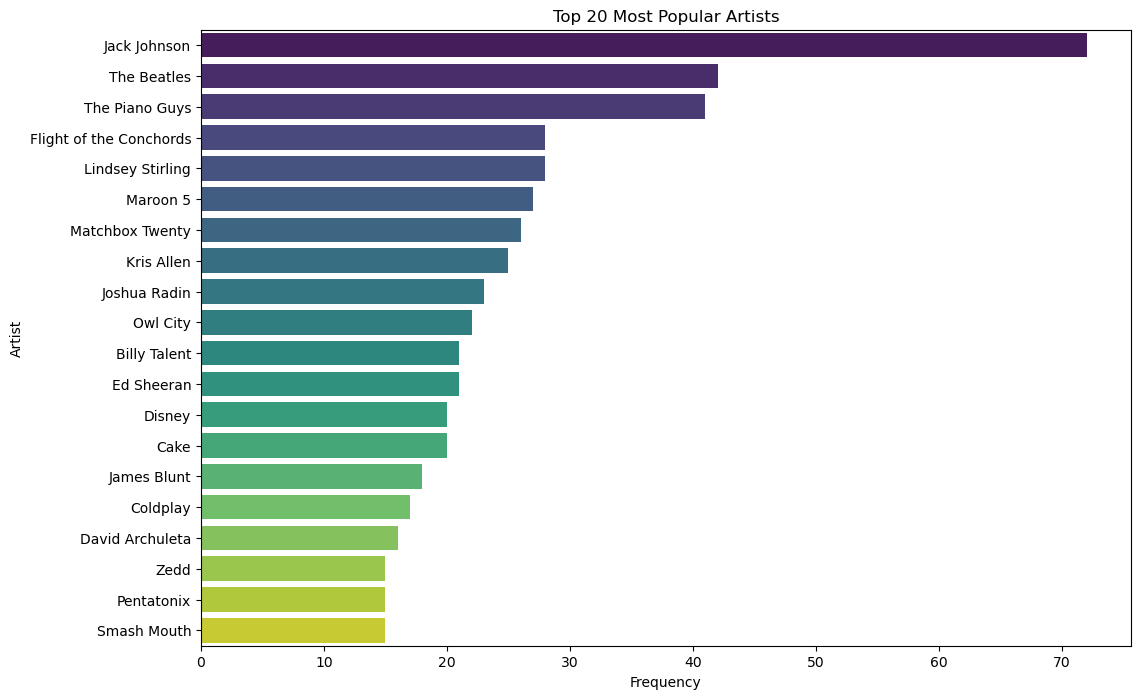

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'artist' is the column containing artist names in your DataFrame
top_artists = df['artist'].value_counts().nlargest(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 20 Most Popular Artists')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.show()

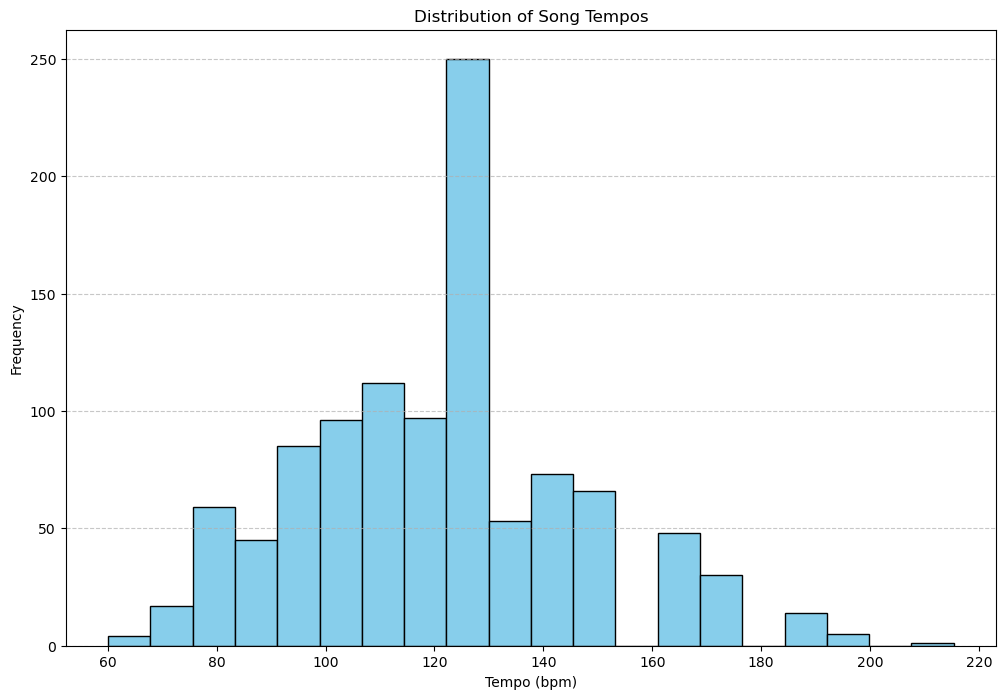

In [222]:
import matplotlib.pyplot as plt

# Assuming 'duration' is the column containing song durations in your DataFrame
plt.figure(figsize=(12, 8))
plt.hist(df['tempo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Tempos')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

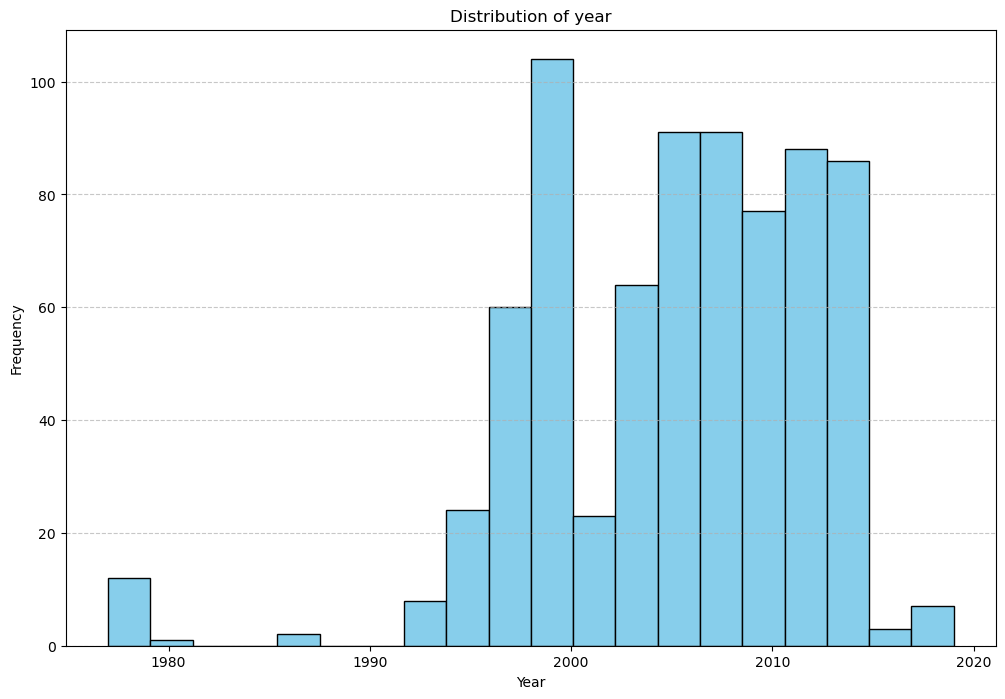

In [254]:
import matplotlib.pyplot as plt

# Assuming 'duration' is the column containing song durations in your DataFrame
plt.figure(figsize=(12, 8))
plt.hist(df['year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

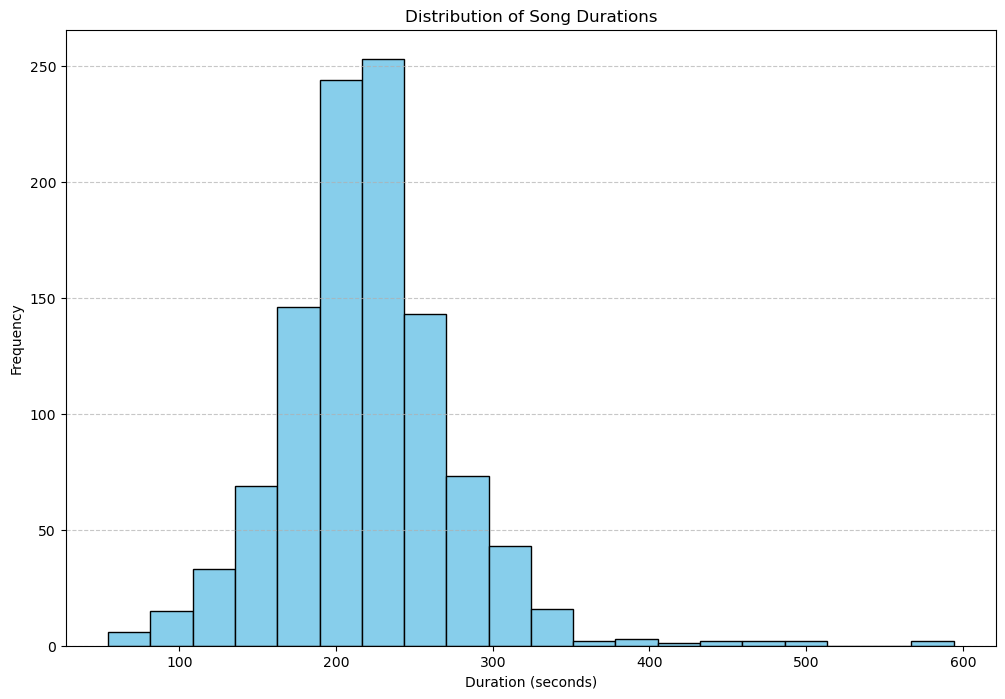

In [223]:
import matplotlib.pyplot as plt

# Assuming 'duration' is the column containing song durations in your DataFrame
plt.figure(figsize=(12, 8))
plt.hist(df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

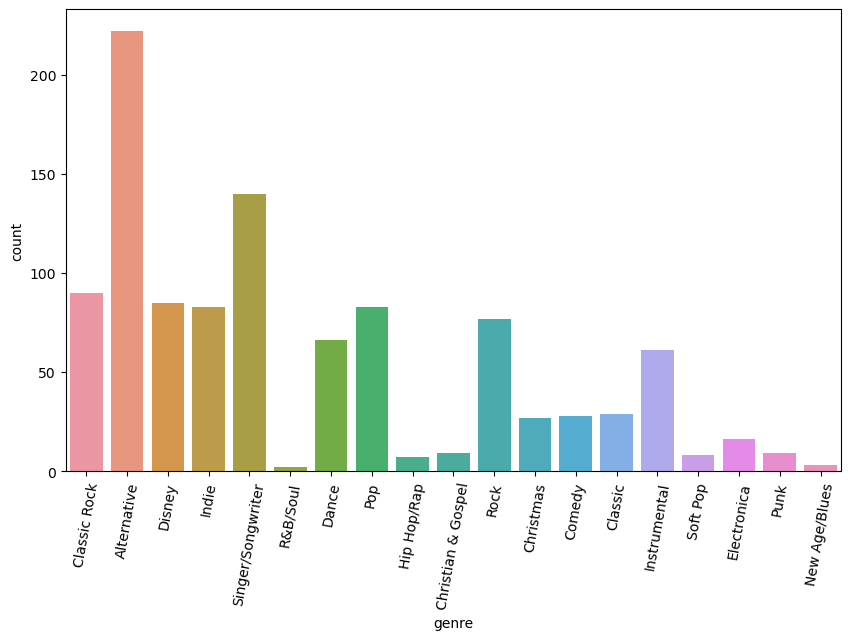

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)
plt.xticks(rotation=80)
plt.show()


### Data Preprocessing

In [225]:
# Function for sentiment analysis 
from afinn import Afinn

# Create an Afinn object for sentiment analysis totals (uses the installed library)
afinn = Afinn()

def get_avg_afinn_score(text):
    afinn = Afinn()
    words = text.split()
    scores = [afinn.score(word) for word in words]
    
    if len(scores) > 0:
        avg_score = sum(scores) / len(scores)
        return avg_score
    else:
        return 0  # Handle the case where there are no words in the text


get_avg_afinn_score("abhorrent abducted")
afinn.score("abducted")

-2.0

In [226]:
import pandas as pd

# Assuming 'df' is your original DataFrame
# Create a copy of the original DataFrame
processed_df = df.copy()

# Now, let's process the 'bit_rate' column and add it to the processed_df
processed_df['bit_rate_numeric'] = pd.to_numeric(df['bit_rate'].str.extract('(\d+\.\d+)')[0])



In [227]:
# convert genre to a number based on this 
from sklearn.preprocessing import LabelEncoder

# Assuming 'processed_df' is your DataFrame
processed_df['genre_numeric'] = LabelEncoder().fit_transform(processed_df['genre'])

In [228]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'processed_df' is your DataFrame
label_encoder = LabelEncoder()

processed_df['title_numeric'] = label_encoder.fit_transform(processed_df['title'])
processed_df['artist_numeric'] = label_encoder.fit_transform(processed_df['artist'])
processed_df['album_numeric'] = label_encoder.fit_transform(processed_df['album'])


In [229]:
# Assuming 'processed_df' is your DataFrame
processed_df['artist_sentiment_total'] = processed_df['artist'].apply(afinn.score)
processed_df['title_sentiment_total'] = processed_df['title'].apply(afinn.score)
processed_df['album_sentiment_total'] = processed_df['album'].apply(afinn.score)

processed_df['artist_sentiment_avg'] = processed_df['artist'].apply(get_avg_afinn_score)
processed_df['title_sentiment_avg'] = processed_df['title'].apply(get_avg_afinn_score)
processed_df['album_sentiment_avg'] = processed_df['album'].apply(get_avg_afinn_score)

,title,artist,album,duration,genre,composer,time_secs,bit_rate,year,key,...,genre_numeric,title_numeric,artist_numeric,album_numeric,artist_sentiment_total,title_sentiment_total,album_sentiment_total,artist_sentiment_avg,title_sentiment_avg,album_sentiment_avg
0,Dizzy Miss Lizzie,The Beatles,Help!,176.225624,Classic Rock,NaN,176.225624,192.0 kbps,1996.0,A,...,4,208,258,107,0.0,-3.0,2.0,0.0,-1.000000,2.000000
1,Cool,Gwen Stefanie,Billboard Top 100 Songs of 2005,189.335510,Alternative,NaN,189.335510,256.0 kbps,2005.0,D,...,0,169,95,37,0.0,1.0,2.0,0.0,1.000000,0.333333
2,Honor to Us All,Beth Fowler,Mulan (Original Motion Picture Soundtrack),183.251882,Disney,NaN,183.251882,256.0 kbps,1998.0,G,...,7,362,23,164,0.0,2.0,0.0,0.0,0.500000,0.000000
3,Good Day Sunshine,The Beatles,Revolver,129.358367,Classic Rock,NaN,129.358367,256.0 kbps,1996.0,B,...,4,323,258,210,0.0,5.0,0.0,0.0,1.666667,0.000000
4,Learn To Fly,Foo Fighters,Foo Fighters: Greatest Hits,234.869841,Alternative,NaN,234.869841,256.0 kbps,NaN,B,...,0,476,82,87,0.0,0.0,3.0,0.0,0.000000,0.750000


In [230]:
# Assuming 'processed_df' is your DataFrame
chroma_to_key = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Create a mapping dictionary
key_mapping = {key: i for i, key in enumerate(chroma_to_key)}

# Map the 'key' column to numeric values
processed_df['key_numeric'] = processed_df['key'].map(key_mapping)

# Display the processed DataFrame
processed_df.head()

,title,artist,album,duration,genre,composer,time_secs,bit_rate,year,key,...,title_numeric,artist_numeric,album_numeric,artist_sentiment_total,title_sentiment_total,album_sentiment_total,artist_sentiment_avg,title_sentiment_avg,album_sentiment_avg,key_numeric
0,Dizzy Miss Lizzie,The Beatles,Help!,176.225624,Classic Rock,NaN,176.225624,192.0 kbps,1996.0,A,...,208,258,107,0.0,-3.0,2.0,0.0,-1.000000,2.000000,9
1,Cool,Gwen Stefanie,Billboard Top 100 Songs of 2005,189.335510,Alternative,NaN,189.335510,256.0 kbps,2005.0,D,...,169,95,37,0.0,1.0,2.0,0.0,1.000000,0.333333,2
2,Honor to Us All,Beth Fowler,Mulan (Original Motion Picture Soundtrack),183.251882,Disney,NaN,183.251882,256.0 kbps,1998.0,G,...,362,23,164,0.0,2.0,0.0,0.0,0.500000,0.000000,7
3,Good Day Sunshine,The Beatles,Revolver,129.358367,Classic Rock,NaN,129.358367,256.0 kbps,1996.0,B,...,323,258,210,0.0,5.0,0.0,0.0,1.666667,0.000000,11
4,Learn To Fly,Foo Fighters,Foo Fighters: Greatest Hits,234.869841,Alternative,NaN,234.869841,256.0 kbps,NaN,B,...,476,82,87,0.0,0.0,3.0,0.0,0.000000,0.750000,11


## Genre Prediction 

In [261]:
# Assuming 'processed_df' is your DataFrame
numeric_fields = [
    'duration',
    'bit_rate_numeric',
    'year',
    'tempo',
    'num_beats',
    'artist_sentiment_total',
    'title_sentiment_total',
    'album_sentiment_total',
    'artist_sentiment_avg',
    'title_sentiment_avg',
    'album_sentiment_avg',
    'key_numeric',
    'genre_numeric'
]

# Create a new DataFrame with only the numeric fields
numeric_df = processed_df[numeric_fields].copy()


# drops all the columns without year
# Remove rows with missing values
numeric_df.dropna(inplace=True)
# only 741

# Display basic information about the dataset
print(numeric_df.info())

# Display summary statistics
print(numeric_df.describe())

# Check for missing values
print(numeric_df.isnull().sum())

# Explore the distribution of genres
print(numeric_df['genre_numeric'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 1054
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                741 non-null    float64
 1   bit_rate_numeric        741 non-null    float64
 2   year                    741 non-null    float64
 3   tempo                   741 non-null    float64
 4   num_beats               741 non-null    int64  
 5   artist_sentiment_total  741 non-null    float64
 6   title_sentiment_total   741 non-null    float64
 7   album_sentiment_total   741 non-null    float64
 8   artist_sentiment_avg    741 non-null    float64
 9   title_sentiment_avg     741 non-null    float64
 10  album_sentiment_avg     741 non-null    float64
 11  key_numeric             741 non-null    int64  
 12  genre_numeric           741 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 81.0 KB
None
         duration  bit_rate_numeric         yea

In [262]:
from sklearn.model_selection import train_test_split

target = 'genre_numeric'        # Target variable
features = [col for col in numeric_fields if col != target]  # Exclude the 'target'

# Split the data into features and target variable
X = numeric_df[features]
y = numeric_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (592, 12) (592,)
Testing set shape: (149, 12) (149,)


In [263]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report with zero_division set to 1
print("Classification Report:")
report = classification_report(y_test, y_pred, zero_division=1)
# print(report)



Accuracy: 0.6644295302013423
Classification Report:


In [264]:
#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier(random_state=42)

# Train the model on the training set
clf_rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Display classification report with zero_division set to 1
print("Random Forest Classification Report:")
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print(report_rf)


Random Forest Accuracy: 0.6241610738255033
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.65        29
           2       1.00      0.33      0.50         3
           3       0.50      0.20      0.29         5
           4       0.72      0.93      0.81        14
           5       1.00      0.00      0.00         4
           6       1.00      0.00      0.00         3
           7       0.60      0.60      0.60        20
           8       1.00      0.00      0.00         2
          10       0.38      0.36      0.37        14
          11       0.54      0.88      0.67         8
          13       0.71      1.00      0.83        10
          14       1.00      0.00      0.00         4
          16       0.70      0.88      0.78         8
          17       0.73      0.64      0.68        25

    accuracy                           0.62       149
   macro avg       0.75      0.47      0.44       149


In [265]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
clf_gb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = clf_gb.predict(X_test)

# Evaluate the model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Display classification report with zero_division set to 1
print("Gradient Boosting Classification Report:")
report_gb = classification_report(y_test, y_pred_gb, zero_division=1)
print(report_gb)


Gradient Boosting Accuracy: 0.5906040268456376
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.66      0.60        29
           2       0.00      0.00      1.00         3
           3       1.00      0.40      0.57         5
           4       0.78      1.00      0.88        14
           5       0.50      0.25      0.33         4
           6       1.00      0.00      0.00         3
           7       0.63      0.60      0.62        20
           8       0.50      0.50      0.50         2
           9       0.00      1.00      0.00         0
          10       0.45      0.36      0.40        14
          11       0.33      0.38      0.35         8
          13       0.82      0.90      0.86        10
          14       0.00      0.00      1.00         4
          15       0.00      1.00      0.00         0
          16       0.67      0.75      0.71         8
          17       0.59      0.64      0.62    

## Music Recomendation 
This section intends to create a music recomendation based on current user songs - it is a work in progress

In [278]:
processed_df
import pandas as pd

# Assuming your DataFrame is named 'df'
# Specify the number of rows you want to select (replace '5' with your desired number)
num_rows_to_select = 20

# Get a random subset of rows
random_subset_df = processed_df.sample(n=num_rows_to_select, random_state=42)  # Set a random seed for reproducibility

# Display the random subset
(random_subset_df)

,title,artist,album,duration,genre,composer,time_secs,bit_rate,year,key,...,title_numeric,artist_numeric,album_numeric,artist_sentiment_total,title_sentiment_total,album_sentiment_total,artist_sentiment_avg,title_sentiment_avg,album_sentiment_avg,key_numeric
260,For the First Time In Forever (Reprise),Disney,Frozen (Original Motion Picture Soundtrack),150.233107,Disney,NaN,150.233107,256.0 kbps,2013.0,E,...,284,62,91,0.0,0.0,0.0,0.0,0.0,0.0,4
832,All The Little Lights,Passenger,All The Little Lights,235.891519,Indie,Michael David Rosenberg,235.891519,256.0 kbps,2012.0,D,...,26,212,16,0.0,0.0,0.0,0.0,0.0,0.0,2
846,Nightmares (ft. Random Impulse Sway & Wretch 32),Ed Sheeran,+ (Deluxe Edition),243.066485,Singer/Songwriter,NaN,243.066485,256.0 kbps,NaN,C#,...,576,69,1,0.0,0.0,0.0,0.0,0.0,0.0,1
1006,Back Home (ft Jake Owen),Owl City,Mobile Orchestra,189.962449,Alternative,NaN,189.962449,256.0 kbps,NaN,E,...,53,210,160,0.0,0.0,0.0,0.0,0.0,0.0,4
88,Hiphopapotamus v Rhymenocerous,Flight of the Conchords,HBO Flight of the Conchords,226.399266,Comedy,NaN,226.399266,128.0 kbps,NaN,B,...,352,80,102,0.0,0.0,0.0,0.0,0.0,0.0,11
457,Because of You,The Piano Guys,Wonders,244.807982,Instrumental,Al van der Beek; Steven Sharp Nelson,244.807982,256.0 kbps,2014.0,D,...,72,269,302,0.0,0.0,0.0,0.0,0.0,0.0,2
184,Me & You (ft. Axol),Uplink & Alex Skrindo,Me & You,198.878912,Electronica,NaN,198.878912,256.0 kbps,2017.0,A,...,536,283,156,0.0,0.0,0.0,0.0,0.0,0.0,9
987,Here Comes The Sun,The Beatles,Abbey Road,188.266906,Classic Rock,NaN,188.266906,192.0 kbps,1996.0,A,...,347,258,12,0.0,0.0,0.0,0.0,0.0,0.0,9
367,Strip That Down (ft. Quavo),Liam Payne,Strip That Down - Single,204.567800,Pop,NaN,204.567800,256.0 kbps,NaN,F#,...,793,159,239,0.0,0.0,0.0,0.0,0.0,0.0,6
558,"Mine, Mine, Mine",David Ogden Stiers And Mel Gibson,Pocahontas (Original Motion Picture Soundtrack),186.015057,Disney,Alan Menken,186.015057,256.0 kbps,1996.0,G,...,543,61,196,0.0,0.0,0.0,0.0,0.0,0.0,7


In [279]:
feature_columns = ['duration', 'tempo', 'genre_numeric']  # Adjust this based on your selected features
feature_matrix = random_subset_df[feature_columns]
feature_matrix

,duration,tempo,genre_numeric
260,150.233107,95.703125,7
832,235.891519,117.453835,10
846,243.066485,117.453835,17
1006,189.962449,161.499023,0
88,226.399266,107.666016,5
457,244.807982,143.554688,11
184,198.878912,129.199219,8
987,188.266906,129.199219,4
367,204.567800,107.666016,13
558,186.015057,112.347147,7


In [280]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_feature_matrix = scaler.fit_transform(feature_matrix)
normalized_feature_matrix

array([[-1.3665167 , -1.1909081 , -0.24004979],
       [ 0.70595783, -0.32783848,  0.29339419],
       [ 0.87955355, -0.32783848,  1.53809682],
       [-0.40527953,  1.41987749, -1.48475243],
       [ 0.47629616, -0.71621981, -0.59567912],
       [ 0.92168844,  0.70784506,  0.47120885],
       [-0.18954892,  0.13821911, -0.06223513],
       [-0.44630258,  0.13821911, -0.77349378],
       [-0.0519083 , -0.71621981,  0.82683818],
       [-0.50078527, -0.53047222, -0.24004979],
       [ 0.03741766, -0.32783848,  1.36028216],
       [-1.44629208, -1.1909081 , -0.59567912],
       [ 0.23236172, -0.8871076 , -0.24004979],
       [-0.84404413,  2.89871409, -0.24004979],
       [ 0.716632  ,  0.40804193,  0.29339419],
       [-0.87550485,  0.70784506,  1.53809682],
       [-1.63744331,  0.40804193, -0.77349378],
       [ 0.44415974, -0.32783848, -1.48475243],
       [ 0.55595764,  1.04291914,  1.89372615],
       [ 2.79360092, -1.32653333, -1.48475243]])

In [282]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(normalized_feature_matrix)
similarity_matrix

array([[ 1.        , -0.42388209, -0.35837011, -0.20390567,  0.18038168,
        -0.966268  ,  0.24641799,  0.3818656 ,  0.36226472,  0.97825174,
         0.00498494,  0.98415138,  0.45957585, -0.4046938 , -0.95952473,
        -0.00453517,  0.57076931,  0.04829756, -0.60180922, -0.29992791],
       [-0.42388209,  1.        ,  0.787045  , -0.68159051,  0.45533411,
         0.53383712, -0.9776946 , -0.78134745,  0.48382679, -0.39142066,
         0.45776638, -0.49248527,  0.48754485, -0.64168813,  0.62934349,
        -0.25155748, -0.9822047 , -0.01106628,  0.32645727,  0.69086236],
       [-0.35837011,  0.787045  ,  1.        , -0.82309066, -0.1392277 ,
         0.57681038, -0.70371082, -0.99956055,  0.74032651, -0.45942985,
         0.88520351, -0.50753204,  0.07375708, -0.37782817,  0.60095037,
         0.39702331, -0.82623266, -0.62556291,  0.76071454,  0.09841055],
       [-0.20390567, -0.68159051, -0.82309066,  1.        , -0.1485907 ,
        -0.02594005,  0.71912647,  0.80623143, -

In [285]:
def recommend_songs(song_index, similarity_matrix, num_recommendations=20):
    song_similarity_scores = similarity_matrix[song_index]
    similar_songs_indices = song_similarity_scores.argsort()[:-num_recommendations-1:-1]
    return similar_songs_indices

In [286]:
song_index_to_recommend_for = 0  # Replace with the index of the song you want recommendations for
recommendations = recommend_songs(song_index_to_recommend_for, similarity_matrix)
print("Recommended Songs:", recommendations)

Recommended Songs: [ 0 11  9 16 12  7  8  6  4 17 10 15  3 19  2 13  1 18 14  5]
